In [1]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

In [2]:
iris = datasets.load_iris()

In [3]:
X = iris['data'][:,(2,3)]

In [4]:
y =  (iris['target'] == 2).astype(np.float64)

In [9]:
svm_clf = Pipeline ((
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=1, loss="hinge"))
))

In [10]:
svm_clf.fit(X, y)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linear_svc', LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0))])

In [12]:
svm_clf.predict([[5.5,1.7]])

array([1.])

In [63]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

In [165]:
X, y = make_moons(noise=0.25)

In [166]:
polynomial_svm_clf = Pipeline((
    ("poly_features", PolynomialFeatures(degree=3))
    ,("scaler", StandardScaler())
    ,("svm_clf", LinearSVC(C=10, loss="hinge"))
))

In [167]:
polynomial_svm_clf.fit(X,y)

Pipeline(memory=None,
     steps=[('poly_features', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', LinearSVC(C=10, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0))])

In [168]:
import matplotlib.pyplot as plt
%matplotlib inline

In [169]:
def draw_decision_boundary (clf, X, y):

    def make_meshgrid(x, y, h=.02):
        """Create a mesh of points to plot in

        Parameters
        ----------
        x: data to base x-axis meshgrid on
        y: data to base y-axis meshgrid on
        h: stepsize for meshgrid, optional

        Returns
        -------
        xx, yy : ndarray
        """
        x_min, x_max = x.min() - 1, x.max() + 1
        y_min, y_max = y.min() - 1, y.max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                             np.arange(y_min, y_max, h))
        return xx, yy


    def plot_contours(ax, clf, xx, yy, **params):
        """Plot the decision boundaries for a classifier.

        Parameters
        ----------
        ax: matplotlib axes object
        clf: a classifier
        xx: meshgrid ndarray
        yy: meshgrid ndarray
        params: dictionary of params to pass to contourf, optional
        """
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        out = ax.contourf(xx, yy, Z, **params)
        return out

    X0, X1 = X[:, 0], X[:, 1]
    xx, yy = make_meshgrid(X0, X1)
    ax1 = plt.subplot2grid((1,1),(0,0))

    plot_contours(ax1, clf, xx, yy,
                      cmap=plt.cm.coolwarm, alpha=0.8)
    ax1.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=30, edgecolors='k')
    
    return ax1

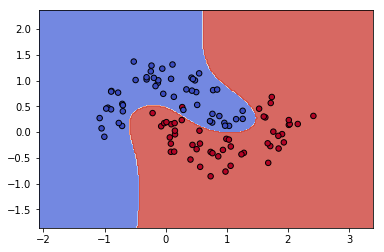

In [170]:
draw_decision_boundary(polynomial_svm_clf,X,y)

Text(0.5,1,'Degree = 3, C = 5')

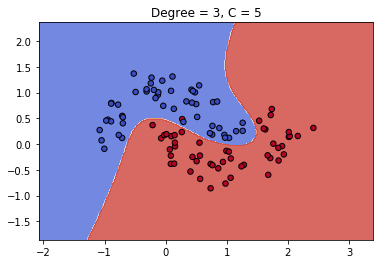

In [171]:
from sklearn.svm import SVC
poly_kernel_svm_clf = Pipeline((
    ('scaler', StandardScaler())
    ,('scm_clf', SVC(kernel='poly', degree=3,coef0=1, C=5))
))
poly_kernel_svm_clf.fit(X,y)
ax1= draw_decision_boundary(poly_kernel_svm_clf,X,y)
ax1.set_title("Degree = 3, C = 5")

Text(0.5,1,'Degree = 10, C = 5')

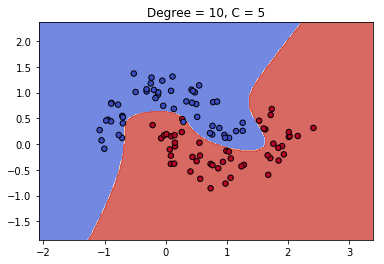

In [173]:
poly_kernel_svm_clf = Pipeline((
    ('scaler', StandardScaler())
    ,('scm_clf', SVC(kernel='poly', degree=10,coef0=1, C=5))
))
poly_kernel_svm_clf.fit(X,y)
ax1= draw_decision_boundary(poly_kernel_svm_clf,X,y)
ax1.set_title("Degree = 10, C = 5")

Text(0.5,1,'Radial Bias Function, C = 0.0001')

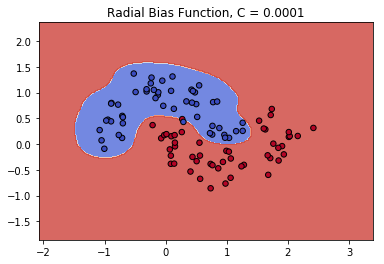

In [180]:
#define the model
poly_kernel_svm_clf = Pipeline((
    ('scaler', StandardScaler())
    ,('scm_clf', SVC(kernel='rbf', gamma=5,C=0.0001))
))

#fit the model
poly_kernel_svm_clf.fit(X,y)

#plot the decision boundary
ax1= draw_decision_boundary(poly_kernel_svm_clf,X,y)
ax1.set_title("Radial Bias Function, C = 0.0001")